In [1]:
import utils
import autoregression as ar

In [91]:
temperature = utils.parse_file('data/pcu1/Supply trafo A winding 2W temp.csv', 'temp')
auxiliaries = utils.parse_file('data/pcu1/AUX ON from PCU.csv', 'aux_on')
current = utils.parse_file('data/pt1/i1.csv', 'I')

In [135]:
X, y = ar.make_design_matrix(auxiliaries, current, temperature, 9)
cols = list(X.columns[2:])
X = utils.scale(X,cols, with_std=True, with_mean=False)
y = utils.scale(y, with_std=True, with_mean=False)
s, u = temperature.std(axis=0), 0 #temperature.mean(axis=0)

aux = auxiliaries.copy()
aux['aux_off'] = 1 - auxiliaries['aux']

curr = current.copy()
curr['I2'] = curr['I']**2
#curr['r'] = curr['I2']*temperature['temp']
cols = ['I', 'I2']
curr[cols] = utils.scale(curr[cols], with_std=True, with_mean=False)

temp = temperature.copy()
temp_mean = temp['temp']
temp = utils.scale(temp, with_std=False, with_mean=True)
s, u = temperature.std(axis=0), temperature.mean(axis=0)

X, y = ar.make_design_matrix(aux, curr, temp, 9)

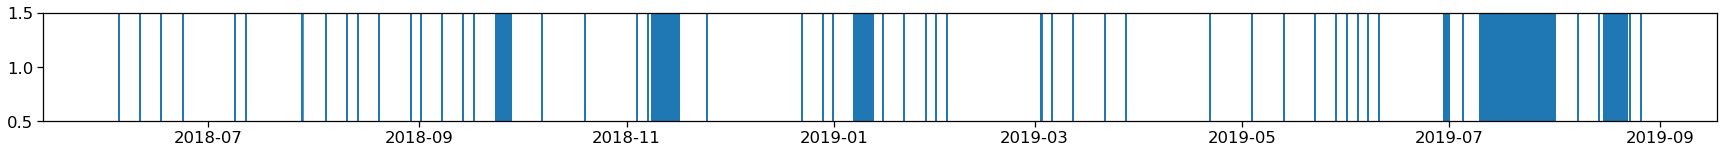

In [4]:
T = utils.sample_gaps(X)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,2))
#axes.stem(T.index, T['gap'], markerfmt=' ', basefmt=' ')
axes.eventplot(T.index, orientation='horizontal')
axes.set_ylim(.5,1.5)
plt.show()

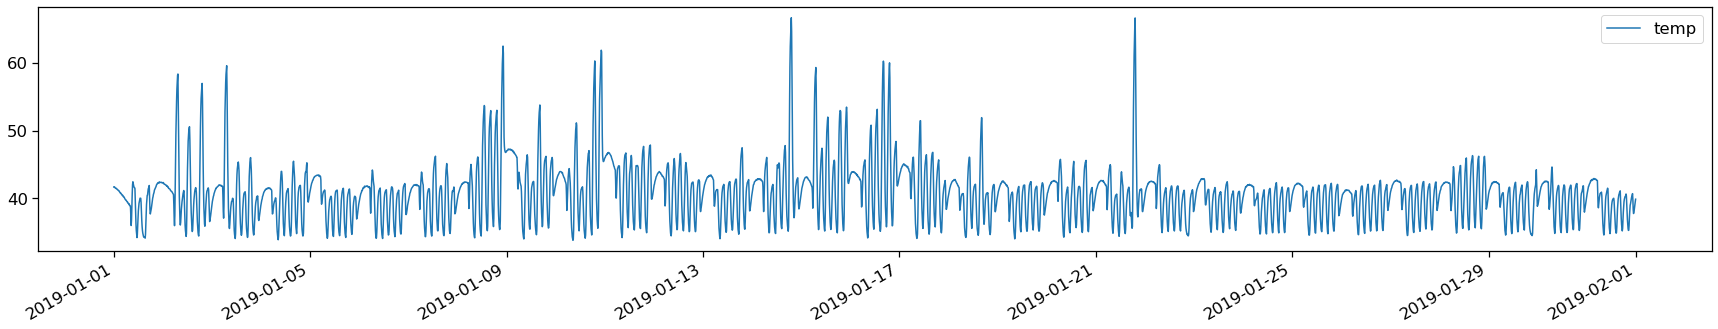

In [5]:
(temp*s+u)['2019-01-01 00:00:00':'2019-02-01 00:00:00'].plot(figsize=(30,5))
plt.show()

In [136]:
b = ar.ols(X, y, start=None, end='2018-09-01 00:00:00')
b

array([[ 9.28098524e-01],
       [ 1.11057744e+00],
       [ 4.70774897e-04],
       [ 1.51000697e-01],
       [ 1.80154222e+00],
       [-1.22307145e+00],
       [ 2.29817471e-01],
       [ 3.34861596e-01],
       [-3.05982891e-01],
       [ 5.35066748e-02],
       [ 4.42684367e-02],
       [-8.89212326e-02],
       [ 6.51885382e-02]])

R2=0.850


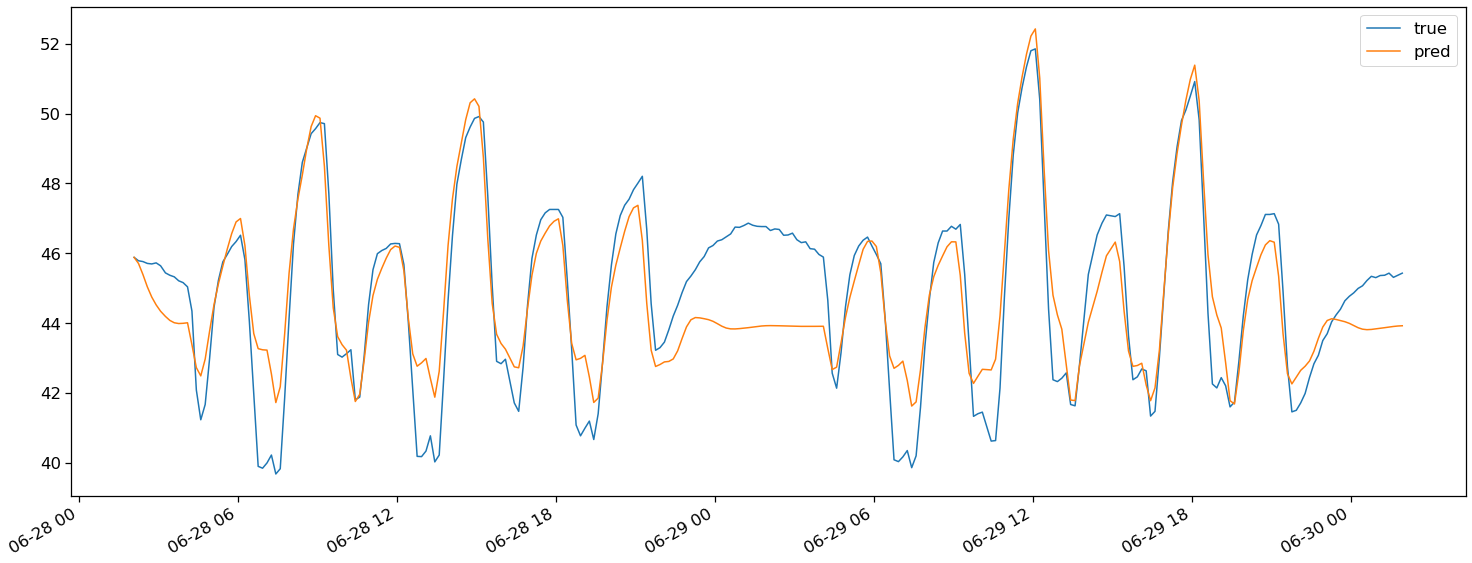

In [143]:
start = '2018-06-28 02:00:00'
end = '2018-12-29 22:00:00'
end = np.datetime64(start) + np.timedelta64(2, 'D')

y_true = y[start:end]
y_pred = ar.evaluate(b, X, y[start:end]['temp'][0], start=start, end=end)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25,10))
ax = axes
(y_true*s+u).plot(ax=ax)
(y_pred*s+u).plot(ax=ax)

r2 = skl.metrics.r2_score(y_true.between_time('04:00:00', '22:00:00'), y_pred.between_time('04:00:00', '22:00:00'))
#r2 = skl.metrics.r2_score(y_true, y_pred)
print(f'R2={r2:.3f}')

ax.legend(['true', 'pred'])
plt.show()